In [223]:
import numpy as np
import pandas as pd
import datetime as dt
import re
import matplotlib.pyplot as plt
from collections import Counter
from scipy import stats

In [87]:
#conda list python

In [88]:
import warnings
warnings.filterwarnings("ignore")

In [89]:
df1 = pd.read_csv('duration eda_bowen.csv')

In [90]:
df1.shape

(1089, 35)

In [91]:
df1.columns

Index(['Unnamed: 0', 'rank', 'nct number', 'title', 'acronym', 'status',
       'study results', 'conditions', 'interventions', 'outcome measures',
       'sponsor/collaborators', 'gender', 'age', 'phases', 'enrollment',
       'funded bys', 'study type', 'study designs', 'other ids', 'start date',
       'primary completion date', 'completion date', 'first posted',
       'results first posted', 'last update posted', 'locations',
       'study documents', 'url', 'duration', 'ftype2', 'cond1', 'allocation',
       'interv_mod2', 'mask1', 'purp1'],
      dtype='object')

In [92]:
df1['start date'].max()

'2022-11-04'

In [93]:
df1['completion date'].max()

'2023-03-13'

In [94]:
df1.columns

Index(['Unnamed: 0', 'rank', 'nct number', 'title', 'acronym', 'status',
       'study results', 'conditions', 'interventions', 'outcome measures',
       'sponsor/collaborators', 'gender', 'age', 'phases', 'enrollment',
       'funded bys', 'study type', 'study designs', 'other ids', 'start date',
       'primary completion date', 'completion date', 'first posted',
       'results first posted', 'last update posted', 'locations',
       'study documents', 'url', 'duration', 'ftype2', 'cond1', 'allocation',
       'interv_mod2', 'mask1', 'purp1'],
      dtype='object')

In [95]:
df1['outcome measures'].str.lower()

0       maximum tolerated dose|toxicity profile of et1...
1       mtd of everolimus in combination with r-chop|a...
2       safety and tolerability of parsaclisib in comb...
3       percentage of participants who experienced a d...
4       incidence rate of dose-limiting toxicities (dl...
                              ...                        
1084    maximum tolerated dose (mtd)|number of partici...
1085    assess safety and feasibility of monoclonal ab...
1086                                                  NaN
1087                                                  NaN
1088    phase i: maximum tolerated dose|phase ii: anti...
Name: outcome measures, Length: 1089, dtype: object

In [96]:
df1 = df1.rename(columns = {'nct number':'nct_number'})

In [97]:
df2 = pd.read_csv('updated_Lymphoma-P1 (1).csv')

In [98]:
df2.columns

Index(['rank', 'nct_number', 'title', 'acronym', 'status', 'study_results',
       'conditions', 'interventions', 'outcome_measures',
       'sponsor/collaborators', 'gender', 'age', 'phases', 'enrollment',
       'funded_bys', 'study_type', 'study_designs', 'other_ids',
       'results_first_posted', 'locations', 'study_documents', 'url',
       'duration', 'measure_AEs', 'measure_PFS', 'measure_DLT', 'measure_MTD',
       'measure_Cmax', 'measure_OS', 'measure_DOR', 'measure_Tmax', 'measure_',
       'measure_OR', 'lead_outcome_measure', 'number_of_measures',
       'drug_included', 'biological_included', 'other_included',
       'procedure_included', 'radiation_included', 'intervention_count',
       'multiple_interverions', 'include_country_United States',
       'include_country_France', 'include_country_United Kingdom',
       'include_country_Germany', 'include_country_Japan',
       'include_country_Spain', 'include_country_Italy',
       'include_country_Canada', 'include_coun

In [99]:
df = df1.merge(df2[['nct_number','lead_outcome_measure','measure_PFS', 'measure_MTD', 'measure_Cmax', 'measure_OS',
       'measure_DOR', 'measure_DLT', 'measure_', 'measure_AEs', 'measure_Tmax', 'number_of_measures', 'drug_included',
       'biological_included', 'other_included', 'procedure_included', 'radiation_included',
       'intervention_count', 'multiple_interverions',
       'include_country_United States', 'include_country_France',
       'include_country_United Kingdom', 'include_country_Germany',
       'lead_country', 'location_count', 'multiple_locations','national_cancer_institute_(nci)_as_sponsor',
       'national_institutes_of_health_clinical_center_(cc)_as_sponsor',
       'm.d._anderson_cancer_center_as_sponsor', 'celgene_as_sponsor',
       'millennium_pharmaceuticals_inc._as_sponsor']], how = 'left')

In [100]:
df.columns = df.columns.str.lower()

In [101]:
df.shape

(1089, 65)

In [102]:
#df[df.duration==30]['start date']

## add variables from Fangya

In [103]:
## 1. sponsor/collaborator

In [104]:
spon = " ".join(df["sponsor/collaborators"].str.split('|').explode("sponsor/collaborators")).lower().split(" ")

In [105]:
pd.DataFrame.from_dict(Counter(spon), orient='index').reset_index().sort_values(by=0, ascending = False)[:20]

,index,0
12,cancer,475
11,national,338
13,institute,312
14,(nci),254
36,center,250
4,university,232
58,of,231
2,inc.,184
59,health,78
7,clinical,78


In [106]:
values=["university", "academic", "research" ,"hospital", "nci", "institute"]
# Industry vs Academic
df['np_spon'] = np.where(df["sponsor/collaborators"].str.lower().str.contains('|'.join(values)),1 ,0)

In [107]:
df["sponsor/collaborators"]

0              Eureka Therapeutics Inc.|Peking University
1       Alliance for Clinical Trials in Oncology|Natio...
2                                      Incyte Corporation
3                      Beijing Mabworks Biotech Co., Ltd.
4       The Lymphoma Academic Research Organisation|Ka...
                              ...                        
1084                          M.D. Anderson Cancer Center
1085    Baylor College of Medicine|The Methodist Hospi...
1086    Northwestern University|National Cancer Instit...
1087    Northwestern University|National Cancer Instit...
1088                         Philogen S.p.A.|Eudax S.r.l.
Name: sponsor/collaborators, Length: 1089, dtype: object

In [108]:
df.groupby('np_spon')['duration'].agg(['count', 'mean'])

,count,mean
np_spon,,
0,567,1515.696649
1,522,2084.536398


In [109]:
## 2. age - contains child

In [110]:
age = " ".join(df["age"].str.split('|').explode("age")).lower().split(" ")

In [111]:
pd.DataFrame.from_dict(Counter(age), orient='index').reset_index().sort_values(by=0, ascending = False)[:20]

,index,0
3,older,1680
1,years,1289
4,,1049
6,adult),1013
5,"(adult,",844
0,18,827
2,and,713
7,to,336
15,"(child,",166
16,"adult,",123


In [112]:
df['adult_include']=np.where(df["age"].str.lower().str.contains("adult"),1 ,0)
df['child_include']=np.where(df["age"].str.lower().str.contains("child"),1 ,0)

In [113]:
## title

In [114]:
title = " ".join(df["title"].str.split('|').explode("title")).lower().split(" ")

In [115]:
pattern = re.compile(r"\b(refractory|relapse|replapsed)|relapsed/refractory|efficacy|transplantation|transplant|combination|immuno\b", re.IGNORECASE)
df["ccat"]=np.where(df["title"].str.lower().str.contains(pattern),1 ,0)

In [116]:
df.groupby('ccat')['duration'].agg(['count', 'mean'])

,count,mean
ccat,,
0,545,1654.851376
1,544,1922.121324


In [117]:
## outcome measure

In [118]:
# EFF vs non safety
pattern = re.compile(r"\b(overall survival|os|pfs|progression free survival|best overall survival|bor|duration of response|cr|crr|complete response)\b", re.IGNORECASE)
df["out_ms"]=np.where(df["outcome measures"].str.lower().str.contains(pattern),1,0)

In [119]:
df.groupby('out_ms')['duration'].agg(['count', 'mean'])

,count,mean
out_ms,,
0,635,1671.056693
1,454,1952.438326


## 1. duration bin

<AxesSubplot:>

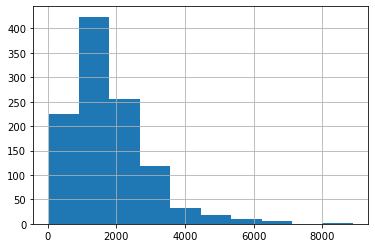

In [120]:
df.duration.hist()

In [121]:
df.duration.mean()

1788.3636363636363

In [122]:
def condition(x):
    if x<1825:
        return "D1: <5yr"
    else:
        return 'D2: 5yr+'

In [123]:
df['dc'] = df['duration'].apply(lambda x: condition(x))

In [124]:
df.dc.value_counts()

D1: <5yr    651
D2: 5yr+    438
Name: dc, dtype: int64

In [125]:
df.columns

Index(['unnamed: 0', 'rank', 'nct_number', 'title', 'acronym', 'status',
       'study results', 'conditions', 'interventions', 'outcome measures',
       'sponsor/collaborators', 'gender', 'age', 'phases', 'enrollment',
       'funded bys', 'study type', 'study designs', 'other ids', 'start date',
       'primary completion date', 'completion date', 'first posted',
       'results first posted', 'last update posted', 'locations',
       'study documents', 'url', 'duration', 'ftype2', 'cond1', 'allocation',
       'interv_mod2', 'mask1', 'purp1', 'lead_outcome_measure', 'measure_pfs',
       'measure_mtd', 'measure_cmax', 'measure_os', 'measure_dor',
       'measure_dlt', 'measure_', 'measure_aes', 'measure_tmax',
       'number_of_measures', 'drug_included', 'biological_included',
       'other_included', 'procedure_included', 'radiation_included',
       'intervention_count', 'multiple_interverions',
       'include_country_united states', 'include_country_france',
       'include_co

## 2. modeling

In [126]:
## 2.0 data prepare - one hot encoding

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
df.dc.value_counts()

D1: <5yr    651
D2: 5yr+    438
Name: dc, dtype: int64

In [129]:
df['y_class'] = 1
df.loc[df['dc'] =="D1: <5yr",'y_class'] = 0

In [130]:
df['indus'] = df['ftype2'].apply(lambda x: 1 if x=='Industry Lead' else 0)

In [131]:
df['condition_count'] = df.conditions.str.count('\|') + 1

In [132]:
df['random'] = df['allocation'].apply(lambda x: 1 if x=='Randomized' else 0)

In [133]:
df['cross'] = df['interv_mod2'].apply(lambda x: 1 if x=='Crossover Assignment' else 0)

In [134]:
df['label_open'] = df['mask1'].apply(lambda x: 1 if x=='None (Open Label)' else 0)
df['label_nopen'] = df['mask1'].apply(lambda x: 1 if x=='Not Open Label' else 0)

In [135]:
df.mask1.value_counts()

None (Open Label)    996
Not Open Label        14
Name: mask1, dtype: int64

In [136]:
df['purp_treat'] = df['purp1'].apply(lambda x: 1 if x=='Treatment/Diagnostic' else 0)
df['purp_prev'] = df['purp1'].apply(lambda x: 1 if x=='Other/Basic/Prevention' else 0)

In [137]:
df.purp1.value_counts()

Treatment/Diagnostic      1035
Other/Basic/Prevention      34
Supportive Care             15
Name: purp1, dtype: int64

In [138]:
df['us_lead'] = df['lead_country'].apply(lambda x: 1 if x=='United States' else 0)
df['france_lead'] = df['lead_country'].apply(lambda x: 1 if x=='France' else 0)
df['uk_lead'] = df['lead_country'].apply(lambda x: 1 if x=='United Kingdom' else 0)
df['german_lead'] = df['lead_country'].apply(lambda x: 1 if x=='Germany' else 0)

In [139]:
df.lead_outcome_measure.value_counts()

Others    541
AEs       185
MTD       133
DLT       123
OR          7
Cmax        4
Tmax        1
OS          1
Name: lead_outcome_measure, dtype: int64

In [140]:
df['lead_aes'] = df['lead_outcome_measure'].apply(lambda x: 1 if x=='AEs' else 0)
df['lead_mtd'] = df['lead_outcome_measure'].apply(lambda x: 1 if x=='MTD' else 0)
df['lead_dlt'] = df['lead_outcome_measure'].apply(lambda x: 1 if x=='DLT' else 0)

In [141]:
df.lead_country.value_counts()

United States     829
Others            195
France             28
United Kingdom     21
Germany            16
Name: lead_country, dtype: int64

In [142]:
df.columns = df.columns.str.lower()

In [143]:
df.columns

Index(['unnamed: 0', 'rank', 'nct_number', 'title', 'acronym', 'status',
       'study results', 'conditions', 'interventions', 'outcome measures',
       'sponsor/collaborators', 'gender', 'age', 'phases', 'enrollment',
       'funded bys', 'study type', 'study designs', 'other ids', 'start date',
       'primary completion date', 'completion date', 'first posted',
       'results first posted', 'last update posted', 'locations',
       'study documents', 'url', 'duration', 'ftype2', 'cond1', 'allocation',
       'interv_mod2', 'mask1', 'purp1', 'lead_outcome_measure', 'measure_pfs',
       'measure_mtd', 'measure_cmax', 'measure_os', 'measure_dor',
       'measure_dlt', 'measure_', 'measure_aes', 'measure_tmax',
       'number_of_measures', 'drug_included', 'biological_included',
       'other_included', 'procedure_included', 'radiation_included',
       'intervention_count', 'multiple_interverions',
       'include_country_united states', 'include_country_france',
       'include_co

# additional features

In [144]:
df['multi_measures'] = 0
df.loc[df['number_of_measures']>1,'multi_measures'] = 1

In [145]:
df['multi_condition'] = 0
df.loc[df['condition_count']>1,'multi_condition'] = 1

# what's 'measure_'

In [146]:
X_features = ["enrollment",
"indus",
"national_cancer_institute_(nci)_as_sponsor",
"location_count",
"us_lead",
#"france_lead",
#"uk_lead",
#"german_lead",
"include_country_united states",
#"include_country_france",
#"include_country_united kingdom",
#"include_country_germany",
"number_of_measures",
# "multi_measures",
# "out_ms",
# "measure_pfs",
"lead_aes",
"lead_mtd",
"lead_dlt",                   
"measure_mtd",
"measure_cmax",
"measure_os",
"measure_dor",
"measure_dlt",
# "measure_",
"measure_aes",
"measure_tmax",
# "measure_orr",
"condition_count",
"intervention_count",
"biological_included",
#"other_included",
"drug_included",
"procedure_included",
'radiation_included',           
"ccat",
"random",
"purp_prev",
"purp_treat",
"label_open",
"label_nopen",
# "multiple_locations",
# "multiple_interverions",
# "multiple_interverions",        
"cross"]

In [147]:
len(X_features)

30

In [148]:
X_features

['enrollment',
 'indus',
 'national_cancer_institute_(nci)_as_sponsor',
 'location_count',
 'us_lead',
 'include_country_united states',
 'number_of_measures',
 'lead_aes',
 'lead_mtd',
 'lead_dlt',
 'measure_mtd',
 'measure_cmax',
 'measure_os',
 'measure_dor',
 'measure_dlt',
 'measure_aes',
 'measure_tmax',
 'condition_count',
 'intervention_count',
 'biological_included',
 'drug_included',
 'procedure_included',
 'radiation_included',
 'ccat',
 'random',
 'purp_prev',
 'purp_treat',
 'label_open',
 'label_nopen',
 'cross']

In [149]:
#df[X_features].head()

In [150]:
#X_features = top20

In [151]:
df[X_features].isna().sum()

enrollment                                    46
indus                                          0
national_cancer_institute_(nci)_as_sponsor     0
location_count                                 0
us_lead                                        0
include_country_united states                  0
number_of_measures                             0
lead_aes                                       0
lead_mtd                                       0
lead_dlt                                       0
measure_mtd                                    0
measure_cmax                                   0
measure_os                                     0
measure_dor                                    0
measure_dlt                                    0
measure_aes                                    0
measure_tmax                                   0
condition_count                                0
intervention_count                             0
biological_included                            0
drug_included       

In [152]:
len(X_features)

30

In [153]:
df.loc[df.enrollment.isna(), 'enrollment'] = df.enrollment.mean()

In [180]:
data = df[X_features+['y_class','duration']]
##change types
bool_cols = data.select_dtypes(include=[bool]).columns
data[bool_cols] = data[bool_cols].astype(int)        

In [181]:
train, test = train_test_split(data, test_size = 0.2, random_state = 42)

In [182]:
lung = pd.read_csv('lungcancer.csv')
lung = lung[X_features+['y_class']]

##change types
bool_cols = lung.select_dtypes(include=[bool]).columns
lung[bool_cols] = lung[bool_cols].astype(int)

In [183]:
# train['tag'] = 'train'
# test['tag'] = 'test'
# lymodel = train.append(test)
# lymodel.to_csv('lymodel.csv')

In [184]:
train.shape

(871, 32)

In [185]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

## 2. cross validation pipelines for all models

# Final - cross validation

In [203]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV,  cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, make_scorer
from sklearn.pipeline import Pipeline
import numpy as np

# Load dataset and split into training, validation, and testing sets

X, y, z = data[X_features], data['y_class'], data['duration']
X_train, X_test, y_train, y_test, z_train, z_test = train_test_split(X, y, z, test_size=0.2, random_state=42, stratify=y)

##addtional test
X_test2, y_test2 = lung[X_features], lung['y_class']

# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'MLP': MLPClassifier(early_stopping=True, max_iter=1000,random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'Gaussian NB': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'LDA': LinearDiscriminantAnalysis()
}

# Hyperparameters for grid search
param_grids = {
    'Random Forest': {
        'classifier__n_estimators': [50, 100, 200,300,500],
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__bootstrap':[True,False]
    }
     ,
#     'XGBoost': {
#         'classifier__learning_rate': [0.01, 0.05, 0.1],
#         'classifier__n_estimators': [100, 200,300,500],
#         'classifier__max_depth': [3, 5, 7],
#     },
    'MLP': {
        'classifier__hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'classifier__activation': ['relu', 'tanh'],
        'classifier__solver': ['adam', 'sgd'],
    }
}

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score, needs_proba=True)
}

for name, model in models.items():
    print(f"===== {name} =====")
    
    pipeline = Pipeline([
        ('classifier', model)
    ])
    
    # If the model has hyperparameters to tune, apply GridSearchCV
    if name in param_grids:
        grid_search = GridSearchCV(pipeline, param_grids[name], cv=5, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_pipeline = grid_search.best_estimator_
        if name == 'Random Forest':
            rf_model = best_pipeline
        # Output the best hyperparameters for each model
        print(f"Best hyperparameters for {name}: {grid_search.best_params_}")
    else:
        best_pipeline = pipeline
        best_pipeline.fit(X_train, y_train)

    # Cross-Validation metrics
    cv_results = cross_validate(best_pipeline, X_train, y_train, cv=5, scoring=scoring)
    
    for metric in scoring.keys():
        mean_metric = np.mean(cv_results[f'test_{metric}'])
        std_metric = np.std(cv_results[f'test_{metric}'])
        print(cv_results[f'test_{metric}'],f"{metric.capitalize()}: {mean_metric:.4f} ± {std_metric:.4f}")


    # Evaluate on the test set
    y_test_pred = best_pipeline.predict(X_test)
    y_test_proba = best_pipeline.predict_proba(X_test)[:, 1] if hasattr(best_pipeline, 'predict_proba') else None
    
    # Evaluate on test set
    print(f"Test accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"Test precision: {precision_score(y_test, y_test_pred):.4f}")
    print(f"Test recall: {recall_score(y_test, y_test_pred):.4f}")
    print(f"Test f1_score: {f1_score(y_test, y_test_pred):.4f}")
    if y_test_proba is not None:
        print(f"Test roc_auc: {roc_auc_score(y_test, y_test_proba):.4f}")

    # Evaluate on the test set2
    y_test_pred2 = best_pipeline.predict(X_test2)
    y_test_proba2 = best_pipeline.predict_proba(X_test2)[:, 1] if hasattr(best_pipeline, 'predict_proba') else None

    # Evaluate on test set2
    print(f"Test2 accuracy: {accuracy_score(y_test2, y_test_pred2):.4f}")

    unique_labels = np.unique(y_test_pred2)
    if len(unique_labels) == 2: # Both classes are present
        print(f"Test2 precision: {precision_score(y_test2, y_test_pred2):.4f}")
        print(f"Test2 recall: {recall_score(y_test2, y_test_pred2):.4f}")
        print(f"Test2 f1_score: {f1_score(y_test2, y_test_pred2):.4f}")
    else:
        print(f"Test2 precision: N/A (Only one class present in predictions)")
        print(f"Test2 recall: N/A (Only one class present in predictions)")
        print(f"Test2 f1_score: N/A (Only one class present in predictions)")

    if y_test_proba2 is not None:
        print(f"Test2 roc_auc: {roc_auc_score(y_test2, y_test_proba2):.4f}")
        
    print()


===== Logistic Regression =====
[0.71428571 0.74137931 0.64942529 0.72413793 0.72988506] Accuracy: 0.7118 ± 0.0324
[0.68518519 0.6984127  0.56       0.65714286 0.66197183] Precision: 0.6525 ± 0.0487
[0.52857143 0.62857143 0.6        0.65714286 0.67142857] Recall: 0.6171 ± 0.0506
[0.59677419 0.66165414 0.57931034 0.65714286 0.66666667] F1: 0.6323 ± 0.0367
[0.7770068  0.80233516 0.72252747 0.78255495 0.79532967] Roc_auc: 0.7760 ± 0.0282
Test accuracy: 0.6376
Test precision: 0.5529
Test recall: 0.5341
Test f1_score: 0.5434
Test roc_auc: 0.7281
Test2 accuracy: 0.7321
Test2 precision: 0.5971
Test2 recall: 0.5863
Test2 f1_score: 0.5917
Test2 roc_auc: 0.7701

===== Decision Tree =====
[0.62285714 0.64942529 0.61494253 0.68390805 0.66091954] Accuracy: 0.6464 ± 0.0252
[0.52941176 0.55421687 0.52459016 0.6056338  0.56962025] Precision: 0.5567 ± 0.0295
[0.51428571 0.65714286 0.45714286 0.61428571 0.64285714] Recall: 0.5771 ± 0.0780
[0.52173913 0.60130719 0.48854962 0.60992908 0.60402685] F1: 0.56

# Model breakdown by probability

In [216]:
rf_model.fit(X_train, y_train)

Pipeline(steps=[('classifier',
                 RandomForestClassifier(bootstrap=False, max_depth=20,
                                        min_samples_split=10,
                                        random_state=42))])

In [225]:
## train 
df_train = X_train.copy()
df_train['y_class'] = y_train
df_train['duration'] = z_train
df_train['pred'] = rf_model.predict(X_train)
df_train['proba'] = rf_model.predict_proba(X_train)[:, 1]

## test
df_test = X_test.copy()
df_test['y_class'] = y_test
df_test['duration'] = z_test
df_test['pred'] = rf_model.predict(X_test)
df_test['proba'] = rf_model.predict_proba(X_test)[:, 1]

### train set

In [226]:
# Define bins for the probabilities
bins = [i/10 for i in range(0, 11, 2)]
labels = [f"{i}-{i+0.2}" for i in bins[:-1]]

df_train['proba_group'] = pd.cut(df_train['proba'], bins=bins, labels=labels, include_lowest=True)

# Function to compute 95% CI for mean
def compute_95_ci(array):
    sample_mean = array.mean()
    sample_std = array.std(ddof=1)
    sample_size = len(array)
    ci_lower = sample_mean - (1.96 * (sample_std / (sample_size ** 0.5)))
    ci_upper = sample_mean + (1.96 * (sample_std / (sample_size ** 0.5)))
    return ci_lower, ci_upper

# Function to compute p-value against global mean
def compute_p_value(array):
    global_mean = df_train['duration'].mean()
    t_stat, p_val = stats.ttest_1samp(array, global_mean)
    return p_val

grouped_train = df_train.groupby('proba_group').agg({
    'y_class': [("Percentage of 1s", lambda x: (x == 1).mean() * 100), 
                ("Count", 'size')],
    'duration': [("Average Duration", 'mean'),
                 ("95% CI", lambda x: compute_95_ci(x)),
                 ("p-value", lambda x: compute_p_value(x))]
})

print(grouped_train)

                                y_class               duration  \
                       Percentage of 1s Count Average Duration   
proba_group                                                      
0.0-0.2                        0.000000   349       999.939828   
0.2-0.4                        2.702703   148      1285.851351   
0.4-0.6000000000000001        68.674699    83      2223.060241   
0.6-0.8                       98.461538   130      2616.615385   
0.8-1.0                      100.000000   161      3056.509317   

                                                                  \
                                                          95% CI   
proba_group                                                        
0.0-0.2                  (955.9745936163271, 1043.9050625441312)   
0.2-0.4                  (1202.9008223899316, 1368.801880312771)   
0.4-0.6000000000000001  (2000.4113506906497, 2445.7091312370612)   
0.6-0.8                   (2469.3373759907395, 2763.89339324003

### test set

In [228]:
# Define bins for the probabilities
bins = [i/10 for i in range(0, 11, 2)]
labels = [f"{i}-{i+0.2}" for i in bins[:-1]]

df_test['proba_group'] = pd.cut(df_test['proba'], bins=bins, labels=labels, include_lowest=True)

# Function to compute 95% CI for mean
def compute_95_ci(array):
    sample_mean = array.mean()
    sample_std = array.std(ddof=1)
    sample_size = len(array)
    ci_lower = sample_mean - (1.96 * (sample_std / (sample_size ** 0.5)))
    ci_upper = sample_mean + (1.96 * (sample_std / (sample_size ** 0.5)))
    return ci_lower, ci_upper

# Function to compute p-value against global mean
def compute_p_value(array):
    global_mean = df_test['duration'].mean()
    t_stat, p_val = stats.ttest_1samp(array, global_mean)
    return p_val

grouped = df_test.groupby('proba_group').agg({
    'y_class': [("Percentage of 1s", lambda x: (x == 1).mean() * 100), 
                ("Count", 'size')],
    'duration': [("Average Duration", 'mean'),
                 ("95% CI", lambda x: compute_95_ci(x)),
                 ("p-value", lambda x: compute_p_value(x))]
})

print(grouped)

                                y_class               duration  \
                       Percentage of 1s Count Average Duration   
proba_group                                                      
0.0-0.2                        8.928571    56      1146.375000   
0.2-0.4                       33.928571    56      1685.392857   
0.4-0.6000000000000001        53.448276    58      2071.931034   
0.6-0.8                       63.157895    38      2330.526316   
0.8-1.0                       90.000000    10      2416.000000   

                                                                                
                                                          95% CI       p-value  
proba_group                                                                     
0.0-0.2                  (977.1784209256743, 1315.5715790743257)  5.258692e-10  
0.2-0.4                 (1443.0674834704855, 1927.7182308152287)  3.760087e-01  
0.4-0.6000000000000001   (1729.6375387359578, 2414.224530229559)  

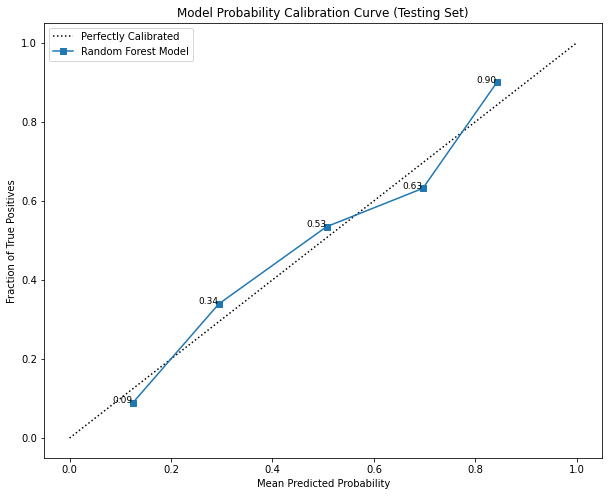

In [246]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

# Predicted probabilities from your model
y_proba = df_test['proba']

# True outcomes
y_true = df_test['y_class']

# Get calibrated probabilities and fraction of positives
prob_true, prob_pred = calibration_curve(y_true, y_proba, n_bins=5, strategy='uniform')

# Plot size modification
plt.figure(figsize=(10, 8))

# Reference line for a perfectly calibrated model
plt.plot([0, 1], [0, 1], 'k:', label='Perfectly Calibrated')
plt.plot(prob_pred, prob_true, 's-', label='Random Forest Model')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of True Positives')
plt.title('Model Probability Calibration Curve (Testing Set)')
plt.legend()

# Display the average fraction of positives for each bin
for i, txt in enumerate(prob_true):
    plt.annotate(f"{txt:.2f}", (prob_pred[i], prob_true[i]), fontsize=9, ha='right')

plt.show()


In [ ]:
from sklearn.metrics import brier_score_loss

score = brier_score_loss(df_test['y_class'], df_test['proba'])
print(f"Brier Score: {score:.4f}")

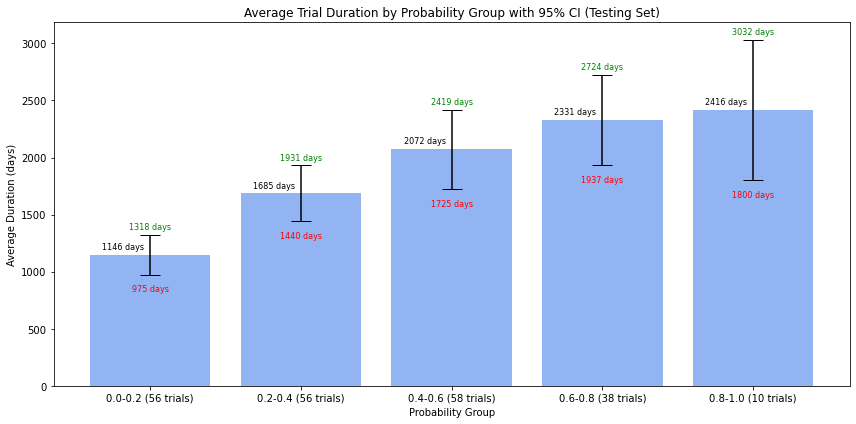

In [266]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

# Assuming x, avg_durations, lower_bounds, upper_bounds, and counts are defined as before

# Choose a blue color, e.g., 'cornflowerblue'
bar_color = 'cornflowerblue'

# Create custom tick labels
labels = [f"{group[0]:.1f}-{group[1]:.1f} ({count} trials)" for group, count in zip(groups, counts)]

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(x, avg_durations, yerr=[avg_durations - np.array(lower_bounds), np.array(upper_bounds) - avg_durations], 
        color=bar_color, alpha=0.7, capsize=10)
plt.xticks(x, labels)
plt.xlabel('Probability Group')
plt.ylabel('Average Duration (days)')
plt.title('Average Trial Duration by Probability Group with 95% CI (Testing Set)')
plt.tight_layout()

# Annotate with mean and CI values
for bar, avg, lb, ub in zip(bars, avg_durations, lower_bounds, upper_bounds):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.-0.18, height + 50, f"{int(round(avg))} days",
             ha='center', color='black', fontsize=8)
    plt.text(bar.get_x() + bar.get_width()/2., lb - 150, f"{int(round(lb))} days",
             ha='center', color='red', fontsize=8)
    plt.text(bar.get_x() + bar.get_width()/2., ub + 50, f"{int(round(ub))} days",
             ha='center', color='green', fontsize=8)

plt.show()


In [265]:
2416/365

6.619178082191781

In [264]:
1146/365

3.1397260273972605

## 2.5 Random Forest

In [190]:
# # Load dataset and split into training, validation, and testing sets
# X, y = data[X_features], data['y_class']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# percentages = [0.2,0.4,0.6,0.8,1.0]
# results = {}

# ##addtional test
# X_test2, y_test2 = lung[X_features], lung['y_class']


# # Hyperparameters for grid search
# param_grid = {
#     'rf': {
#         'rf__n_estimators': [50, 100, 200,300,500],
#         'rf__max_depth': [None, 10, 20, 30],
#         'rf__min_samples_split': [2, 5, 10],
#         'rf__bootstrap':[True,False]
#     }
# }

# scoring = {
#     'accuracy': make_scorer(accuracy_score),
#     'precision': make_scorer(precision_score),
#     'recall': make_scorer(recall_score),
#     'f1': make_scorer(f1_score),
#     'roc_auc': make_scorer(roc_auc_score, needs_proba=True)
# }



# pipeline =  Pipeline([
#     ('rf', RandomForestClassifier(random_state = 42))
# ])


# for perc in percentages:
#     subset_size = int(len(X_train) * perc)
#     X_train_subset = X_train[:subset_size]
#     y_train_subset = y_train[:subset_size]

#     # Assuming you have some param_grid defined somewhere for GridSearch
#     grid_search = GridSearchCV(pipeline, param_grid['rf'], cv=5)
#     grid_search.fit(X_train_subset, y_train_subset)
    
#     best_pipeline = grid_search.best_estimator_
    
#     # Cross-Validation metrics
#     cv_results = cross_validate(best_pipeline, X_train, y_train, cv=5, scoring=scoring)
    
#     results[perc] = {
#         'best_params': grid_search.best_params_,
#         'best_score': grid_search.best_score_,
#         'cv_results': cv_results }

#     for metric in scoring.keys():
#         mean_metric = np.mean(cv_results[f'test_{metric}'])
#         std_metric = np.std(cv_results[f'test_{metric}'])

#         print(cv_results[f'test_{metric}'],f"{metric.capitalize()}: {mean_metric:.4f} ± {std_metric:.4f}")
    
#     # Evaluate on the test set
#     y_test_pred = best_pipeline.predict(X_test)
#     y_test_proba = best_pipeline.predict_proba(X_test)[:, 1] if hasattr(best_pipeline, 'predict_proba') else None

#     # Evaluate on test set
#     print(f"Test accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
#     print(f"Test precision: {precision_score(y_test, y_test_pred):.4f}")
#     print(f"Test recall: {recall_score(y_test, y_test_pred):.4f}")
#     print(f"Test f1_score: {f1_score(y_test, y_test_pred):.4f}")
#     if y_test_proba is not None:
#         print(f"Test roc_auc: {roc_auc_score(y_test, y_test_proba):.4f}")

#     # Evaluate on the test set2
#     y_test_pred2 = best_pipeline.predict(X_test2)
#     y_test_proba2 = best_pipeline.predict_proba(X_test2)[:, 1] if hasattr(best_pipeline, 'predict_proba') else None

#     # Evaluate on test set2
#     print(f"Test2 accuracy: {accuracy_score(y_test2, y_test_pred2):.4f}")

#     unique_labels = np.unique(y_test_pred2)
#     if len(unique_labels) == 2: # Both classes are present
#         print(f"Test2 precision: {precision_score(y_test2, y_test_pred2):.4f}")
#         print(f"Test2 recall: {recall_score(y_test2, y_test_pred2):.4f}")
#         print(f"Test2 f1_score: {f1_score(y_test2, y_test_pred2):.4f}")
#     else:
#         print(f"Test2 precision: N/A (Only one class present in predictions)")
#         print(f"Test2 recall: N/A (Only one class present in predictions)")
#         print(f"Test2 f1_score: N/A (Only one class present in predictions)")

#     if y_test_proba2 is not None:
#         print(f"Test2 roc_auc: {roc_auc_score(y_test2, y_test_proba2):.4f}")


In [191]:
# from sklearn.ensemble import RandomForestClassifier
# #rf_model = RandomForestClassifier(max_depth=8, n_estimators=100, bootstrap = False, min_samples_split= 10, random_state=42).fit(X_train,y_train)

# # Evaluate on the test set
# y_test_pred = rf_model.predict(X_test)
# y_test_proba = rf_model.predict_proba(X_test)[:, 1]

# # Evaluate on test set
# print(f"Test accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
# print(f"Test precision: {precision_score(y_test, y_test_pred):.4f}")
# print(f"Test recall: {recall_score(y_test, y_test_pred):.4f}")
# print(f"Test f1_score: {f1_score(y_test, y_test_pred):.4f}")
# if y_test_proba is not None:
#     print(f"Test roc_auc: {roc_auc_score(y_test, y_test_proba):.4f}")


## 3. EDA for paper

In [192]:
## 3.1 sample characteristics

In [193]:
y_train.value_counts()

0    521
1    350
Name: y_class, dtype: int64

In [194]:
350/(350+521)

0.4018369690011481

In [195]:
y_test.value_counts()

0    130
1     88
Name: y_class, dtype: int64

In [196]:
88/(88+130)

0.4036697247706422

In [197]:
top12 = ["enrollment",
"indus",
"location_count",
"number_of_measures",
"condition_count",
"intervention_count",
"national_cancer_institute_(nci)_as_sponsor",
"measure_aes",
"label_open",
"biological_included",
"ccat",
"random"]

In [198]:
X_train[top12].describe().T

,count,mean,std,min,25%,50%,75%,max
enrollment,871.0,48.755665,57.221954,1.0,20.0,35.0,55.0,686.0
indus,871.0,0.464983,0.499059,0.0,0.0,0.0,1.0,1.0
location_count,871.0,5.836969,11.116564,1.0,1.0,2.0,6.0,144.0
number_of_measures,871.0,6.305396,7.582706,1.0,2.0,4.0,8.0,78.0
condition_count,871.0,3.740528,6.185203,1.0,1.0,2.0,4.0,85.0
intervention_count,871.0,2.545350,2.442431,1.0,1.0,2.0,3.0,17.0
national_cancer_institute_(nci)_as_sponsor,871.0,0.230769,0.421567,0.0,0.0,0.0,0.0,1.0
measure_aes,871.0,0.342135,0.474697,0.0,0.0,0.0,1.0,1.0
label_open,871.0,0.913892,0.280685,0.0,1.0,1.0,1.0,1.0
biological_included,871.0,0.233065,0.423026,0.0,0.0,0.0,0.0,1.0


In [199]:
X_test[top12].describe().T

,count,mean,std,min,25%,50%,75%,max
enrollment,218.0,50.364167,62.890269,1.0,18.0,32.0,56.00,582.0
indus,218.0,0.481651,0.500813,0.0,0.0,0.0,1.00,1.0
location_count,218.0,5.857798,9.362291,1.0,1.0,2.0,6.75,79.0
number_of_measures,218.0,5.922018,6.626185,1.0,2.0,4.0,7.00,52.0
condition_count,218.0,4.073394,7.590567,1.0,1.0,2.0,4.00,67.0
intervention_count,218.0,2.339450,1.884793,1.0,1.0,2.0,3.00,11.0
national_cancer_institute_(nci)_as_sponsor,218.0,0.243119,0.429954,0.0,0.0,0.0,0.00,1.0
measure_aes,218.0,0.344037,0.476146,0.0,0.0,0.0,1.00,1.0
label_open,218.0,0.917431,0.275863,0.0,1.0,1.0,1.00,1.0
biological_included,218.0,0.197248,0.398837,0.0,0.0,0.0,0.00,1.0
